Probabilidade condicional
=========================



## É perigoso seguir sozinho, leve isto!



Este notebook usa o módulo `matplotlib-venn` que não está disponível no kernel `ilumpy` instalado para vocês. Para instalar o módulo, rode o código abaixo. Não é estritamente necessário; se não instalar basta evitar de rodar a célula com o diagrama de Euler logo abaixo.



In [1]:
try:
    import matplotlib_venn
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install matplotlib-venn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: c:\venv\ilumpy\Scripts\python.exe -m pip install --upgrade pip



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33037 sha256=d5a5096f2eda7a4b2c26687c0798cc319358e3ef564d70f8b2fd4ddde417d017
  Stored in directory: c:\users\karla23012\appdata\local\pip\cache\wheels\ab\a1\93\9cbd4e11e6964009387cd595450dfcbb6998e15dfbaa5805dd
Successfully built matplotlib-venn


## A representação gráfica de probabilidades



Suponha a seguinte situação: rolagem de um dado de 10 faces. Neste caso temos que o nosso espaço amostral é

$$
\Omega = \{1,2,3,4,5,6,7,8,9,10\}.
$$

O evento $A$ é o evento de tirar um valor 5 ou menos.

$$
A = \{1,2,3,4,5\}
$$

O evento $B$ é o evento de tirar um valor no intervalo $[3, 6]$.

$$
B = \{3,4,5,6\}
$$

Das informações acima e do nosso conhecimento obtido no notebook anterior, temos que

$$
P(A) = \frac{5}{10} = 0,5
$$

$$
P(B) = \frac{4}{10} = 0,4
$$

$$
P(A \cap B) = \frac{3}{10} = 0,3
$$

Podemos representar visualmente a situação acima utilizando um diagrama de Euler.



Text(-0.65, 0.45, '$\\Omega$')

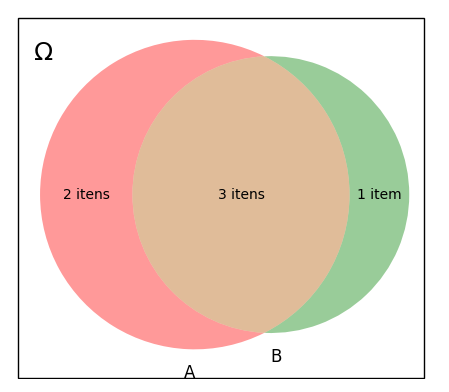

In [2]:
# Código modificado de um código obtido no chatGPT

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.patches import Rectangle

evento_A = {1, 2, 3, 4, 5}
evento_B = {3, 4, 5, 6}

venn = venn2(subsets=(evento_A, evento_B), set_labels=("A", "B"))

venn.get_label_by_id("10").set_text("2 itens")  # evento A
venn.get_label_by_id("01").set_text("1 item")   # evento B
venn.get_label_by_id("11").set_text("3 itens")  # intersecção

eixo = plt.gca()
eixo.add_patch(
    Rectangle((-0.7, -0.612), 1.35, 1.2, fill=False, edgecolor="black")
)

plt.text(-0.65, 0.45, "$\Omega$", fontsize=18)

O diagrama de Euler mostra graficamente todo o espaço amostral na forma de um retângulo. Todo evento é demarcado por uma área e esta área é proporcional à probabilidade do evento ocorrer.



## Chance de um evento ocorrer sabendo que outro evento ocorreu



Qual é a probabilidade do evento $A$ acontecer (tirar um número 5 ou menos no dado de 10 faces) sabendo que o evento $B$ ocorreu (tirar um número no intervalo de $[3,6]$)? A forma de expressar esta ideia é $P(A | B)$ onde o símbolo &ldquo;|&rdquo; é lido como &ldquo;sabendo que ocorreu&rdquo; ou &ldquo;dado que ocorreu&rdquo;.

Se você já sabe que o evento $B$ ocorreu, o que você acha que acontece com nosso espaço amostral? Agora não estamos pensando mais em todas as possibilidades dentro de $\Omega$ visto que sabemos que $B$ ocorreu. Neste caso, estamos restritos apenas na área de $B$. Para seguirmos em frente, é necessário que a área de $B$ seja positiva. Em outras palavras, é necessário que $P(B)>0$.

Sendo nosso espaço amostral o evento $B$ agora, quais são os resultados possíveis onde $A$ também ocorre? A resposta é a intersecção $A \cap B$.

Convertendo o texto para uma formulação matemática, obtemos

$$
P(A | B) = \frac{P(A \cap B)}{P(B)}.
$$

Dizemos que $P(A | B)$ é a *probabilidade condicional* de $A$ ocorrer sabendo que ocorreu $B$.

Temos que $P(A | B)$ para o exemplo discutido na seção anterior é $\frac{0,3}{0,4} = 0,75$



## A regra da multiplicação



Qual é a chance de $A$ e $B$ ocorrem? Já vimos que isto é representado por $P(A \cap B)$. Rearranjando a expressão obtida na seção anterior, temos que

$$
P(A \cap B) = P(A | B) P(B).
$$

Utilizando do mesmo raciocínio, é fácil de mostrar que

$$
P(A \cap B) = P(A) P(B | A).
$$

Observe que a chance de $A$ e $B$ ocorrerem não é simplesmente a multiplicação de $P(A)$ com $P(B)$ como é usualmente apresentado nas disciplinas introdutórias de probabilidade.

Quando a ocorrência de $A$ independe se $B$ ocorreu ou não (em outras palavras, $B$ ocorrer não influencia a ocorrência de $A$), neste caso temos o que chamamos de *eventos independentes* e é nesta situação particular que temos que

$$
P(A | B) = P(A),
$$

e

$$
P(B|A) = P(B).
$$

Logo, para eventos independentes temos que

$$
P(A \cap B) = P(A) P(B).
$$

Um equívoco usual é confundir <u>eventos mutualmente exclusivos</u> com <u>eventos independentes</u>.

Eventos mutualmente exclusivos foram definidos no notebook anterior e são eventos onde temos que

$$
P(A \cap B) = \varnothing.
$$

Graficamente, eventos mutualmente exclusivos são áreas sem intersecção no diagrama de Euler (por isso que outro nome para eventos mutualmente exclusivos é *eventos disjuntos*). Note que eventos mutualmente exclusivos são necessariamente eventos *dependentes*, uma vez que sabemos que a ocorrência de um deles necessariamente implica na não-ocorrência do outro.

Não é possível representar graficamente eventos independentes no diagrama de Euler.

Será que os eventos $A$ e $B$ do exemplo do dado de 10 faces são independentes? Vamos testar!

Calculamos anteriormente que $P(A \cap B)=0,3$, resta saber se este valor é igual a $P(A)P(B)=0,5 \times 0,4=0,2$. Como 0,3 é diferente de 0,2 temos que os eventos $A$ e $B$ não são independentes.

Outra forma de checar neste caso é observar que $P(A | B) \neq P(A)$.



## O teorema de Bayes



O teorema de Bayes é uma das expressões matemáticas mais importantes do estudo da probabilidade. Ela é muito relevante para a ciência como um todo e na área de inteligência artificial em específico.

Vocês já têm todas as ferramentas para deduzir o teorema de Bayes. Vamos recordar as expressões que obtivemos acima:

$$
P(A \cap B) = P(A | B) P(B)
$$

$$
P(A \cap B) = P(A) P(B | A)
$$

Observando as igualdades acima, temos que

$$
P(A | B) P(B) = P(A) P(B | A).
$$

Finalmente, rearranjando chegamos no teorema de Bayes

$$
P(A | B) = \frac{P(A) P(B | A)}{P(B)}.
$$



## Atualizando suas probabilidades com o teorema de Bayes



Quem sabe a simplicidade e elegância do teorema de Bayes não deixe transparecer imediatamente a sua utilidade. Vamos ver um exemplo.

Digamos que eu testei positivo para diabetes no último exame que fiz. O teste que realizei tem acurácia de 90% (isso significa que o teste tem 90% de chances de acertar que você tem ou não tem diabetes). Qual é a probabilidade de que eu tenha diabetes? Será que é 90%? Parece que é, não é? Não sei, vamos calcular esta probabilidade!

Suponha que a hipótese $H$ é o evento &ldquo;eu tenho diabetes&rdquo;.

Suponha que a evidência $E$ é o evento &ldquo;exame de diabetes deu positivo&rdquo;.

Sendo assim, queremos calcular a probabilidade da hipótese ser verdadeira dado que a evidência é verdadeira. Já sabemos como representar isso: $P(H | E)$.

Pelo teorema de Bayes temos que

$$
P(H | E) = \frac{P(H) P(E | H)}{P(E)}.
$$

Desta equação, nós sabemos qual é a probabilidade do meu exame retornar positivo dado que eu tenho diabetes; esta é a acurácia do exame e ela vale $P(E | H)=0,9$ segundo o enunciado. Este termo do teorema de Bayes é chamado de *verossimilhança* (likelihood em inglês).

Qual era a probabilidade $P(H)$ da minha hipótese ser verdadeira antes de eu ter recebido o resultado do exame? Este valor vai depender de diversos fatores, como idade, certas condições de saúde, alimentação, entre outros. Muitas vezes não sabemos exatamente este valor e ele passa a ser um palpite. Vamos supor que a chance de eu ter diabetes é igual a proporção de diabéticos onde eu vivo. Este valor é próximo de 10% segundo este [link](https://g1.globo.com/saude/noticia/2021/11/14/dia-mundial-do-diabetes-157-milhoes-de-brasileiros-vivem-com-a-doenca-diz-relatorio.ghtml). Logo, vamos supor $P(H)=0,1$. Este termo do teorema de Bayes também tem um nome, é a *probabilidade inicial* (prior em inglês).

Qual é a probabilidade $P(E)$ de testar positivo no exame de diabetes? Para computar este valor é melhor abrir a conta. Esta probabilidade é a probabilidade de você testar positivo tendo a doença ($P(H)P(E|H)$) somada à probabilidade de você testar positivo não tendo a doença ($P(H^c)P(E|H^c)$). Lembre-se que $H^c$ é o complemento de $H$, logo $H^c$ representa que $H$ não ocorre (em outras palavras, &ldquo;é falso que $H$ ocorreu&rdquo;). Com isso, temos que

$$
P(E) = P(H)P(E|H) + P(H^c)P(E|H^c).
$$

Como sabemos que $P(H) + P(H^c) = 1$ (ver notebook anterior), temos que $P(H^c)=0,9$. Como a acurácia do teste é de 90%, temos que 10% das pessoas que não tem diabetes são erroneamente diagnosticadas com diabetes com este teste. Isso faz com que $P(E|H^c)=0,1$.

Com isso temos que $P(E) = 0,1 \times 0,9 + 0,9 \times 0,1 = 0,18$.

Temos tudo que precisamos!

$$
P(H | E) = \frac{P(H) P(E | H)}{P(E)} = \frac{0,1 \times 0,9}{0,18} = 0,5 = 50\%
$$

Esse resultado me diz que, na luz da evidência do teste (que tem 90% de acurácia!!) eu devo atualizar a probabilidade inicial que eu tinha diabetes de 10% (que é o $P(H)$) para o novo valor de 50% (que é o $P(H|E)$). O termo $P(H|E)$ também tem um nome, é a *probabilidade a posteriori* (posterior em inglês). Pode parecer estranho considerando que a acurácia do teste é de 90%, mas este é de fato o resultado correto dentro da estatística Bayesiana.

Suponha que eu não fiquei contente e fui realizar o mesmo teste de diabetes pela segunda vez, porém em outro laboratório. Se meu teste retornou positivo novamente, qual é a chance de eu ter diabetes? Neste caso nós não podemos mais usar o valor $P(H)=0,1$ que usamos antes pois esta era a nossa probabilidade inicial antes de termos a evidência do primeiro teste. Qual é a minha probabilidade de ter diabetes? Oras, é de 50%, foi isso que obtivemos como resultado antes de realizar o segundo exame. Por isso, $P(H) = 0,5$ agora. Sendo assim temos

$$
P(H | E) =
\frac{P(H) P(E | H)}{P(E)} =
\frac{P(H) P(E | H)}{P(H)P(E|H) + P(H^c)P(E|H^c)} =
\frac{0,5 \times 0,9}{0,5 \times 0,9 + 0,5 \times 0,1} =
0,9 = 90\%
$$

Com dois testes independentes positivos, agora eu atualizo a minha chance de ter diabetes para 90%. Este valor é razoavelmente maior que 50% e a intuição aqui é que a chance de dois laboratórios independentes resultarem em testes positivos neste caso é baixa.

O teorema de Bayes nos ajuda a atualizar nossas probabilidades na luz de novas evidências. Este é a grande contribuição deste teorema para o desenvolvimento científico. Ele nos diz que a cada nova evidência nós devemos rever como nós enxergamos o mundo ao nosso redor. Observe que você jamais chegará a ter confiança de 100% ou de 0%, não importa quantas evidências você observe se seu valor da probabilidade inicial $P(H)$ for maior que 0 e menor que 1.



## Questionamento filosófico



Na luz do teorema de Bayes, faz sentido argumentar com alguém que tenha convicção absoluta na sua probabilidade inicial (isto é, $P(H)=1$ ou $P(H)=0$)?



## XKCD relevante



![img](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

`Imagem: Frequentists vs. Bayesians (XKCD) disponível em https://xkcd.com/1132`



## Referências



1.  DEVORE, Jay L. Probabilidade E Estatística Para Engenharia E Ciências. Tradução Da 9ª Edição Norte-Americana. Cengage Learning, 2018.

2.  Curso data 8 da universidade de Berkeley [https://inferentialthinking.com/chapters/18/1/More_Likely_than_Not_Binary_Classifier.html](https://inferentialthinking.com/chapters/18/1/More_Likely_than_Not_Binary_Classifier.html)

3.  Resposta no StackExchange sobre eventos independentes e mutualmente exclusivos [https://math.stackexchange.com/a/4346867](https://math.stackexchange.com/a/4346867)

4.  Vídeo do 3blue1brown sobre o teorema de Bayes [https://www.youtube.com/watch?v=HZGCoVF3YvM](https://www.youtube.com/watch?v=HZGCoVF3YvM)

5.  Frequentista ou Bayesiano? [https://www.youtube.com/watch?v=GEFxFVESQXc](https://www.youtube.com/watch?v=GEFxFVESQXc)

6.  Vídeo do Veritasium sobre o problema do teste com alta acurácia [https://www.youtube.com/watch?v=R13BD8qKeTg](https://www.youtube.com/watch?v=R13BD8qKeTg)

